# Project 1 - Car Price Data Analysis

# İMPORT LİBRARİES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier as dtc, plot_tree, export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler ,  MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
import joblib
from imblearn.under_sampling import RandomUnderSampler


# UPLOAD DATA

In [ ]:
df=pd.read_csv(r'/content/drive/MyDrive/S.A/Projects/Project 1/Project 1 - Car Price Prediction/CarPrice_Assignment.csv')

# GETTING TO KNOW DATA (Data Understanding)

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.shape

(205, 26)

In [ ]:
rows,columns=df.shape
print(f'Bu datasetimizde {rows} setir, {columns} sutun var')

Bu datasetimizde 205 setir, 26 sutun var


In [ ]:
sutunlar=df.columns.tolist()
print(sutunlar)

['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [ ]:
categorical_columns=df.select_dtypes(include=['object','category']).columns.tolist()

numerical_columns=df.select_dtypes(include=['int64','float64']).columns.tolist()

print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
Numerical Columns: ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [ ]:
df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [ ]:
df.isna().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [ ]:
df.nunique()

,0
car_ID,205
symboling,6
CarName,147
fueltype,2
aspiration,2
doornumber,2
carbody,5
drivewheel,3
enginelocation,2
wheelbase,53


# DATA CLEANING

In [ ]:
# Hər bir sütunda neçə boş (NaN) dəyər var
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Boş dəyərlər:\n", missing_values)

Boş dəyərlər:
 Series([], dtype: int64)


In [ ]:
# Datasetdə neçə dublikat sətrin olduğunu yoxla
duplicate_rows = df.duplicated()
print(f"Tapılan dublikat sətr sayı: {duplicate_rows.sum()}")

# Dublikatları sil
df.drop_duplicates(inplace=True)
print(f"Dublikatlar silindikdən sonra dataset ölçüsü: {df.shape}")


Tapılan dublikat sətr sayı: 0
Dublikatlar silindikdən sonra dataset ölçüsü: (205, 26)


# EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
df['Brand'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())

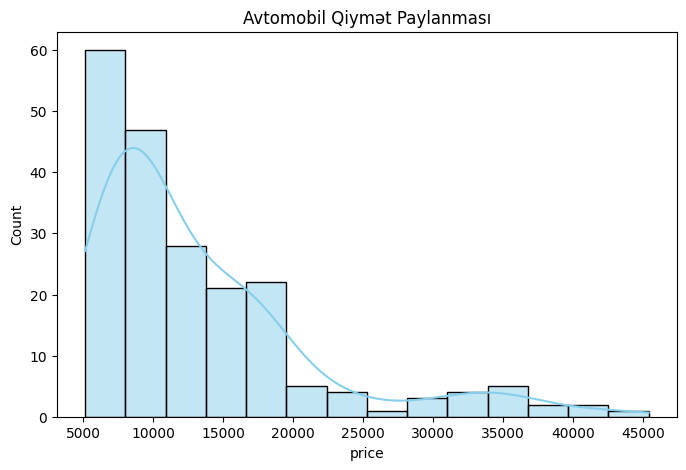

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], kde=True, color='skyblue')
plt.title("Avtomobil Qiymət Paylanması")
plt.show()


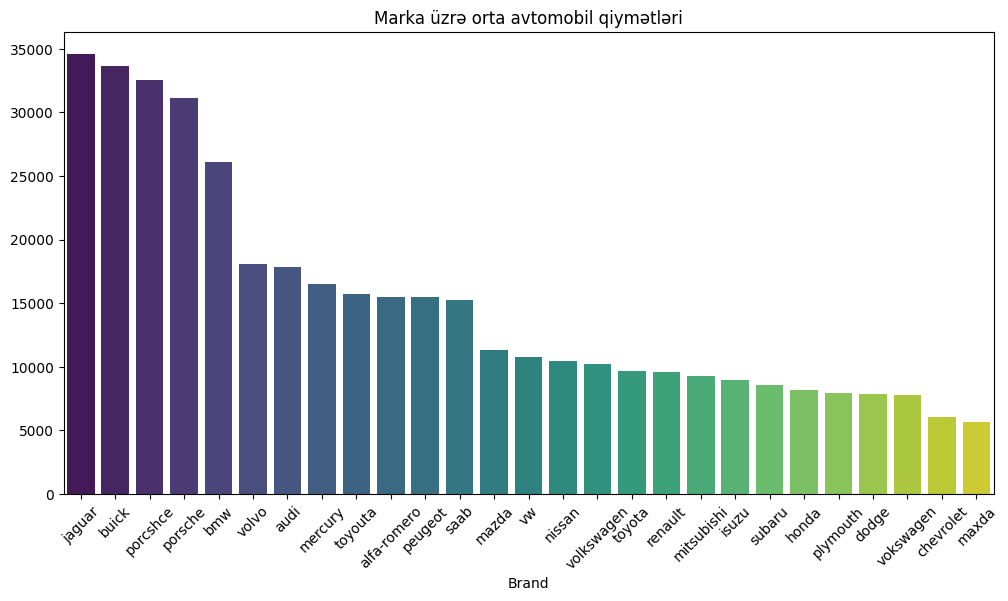

In [ ]:
plt.figure(figsize=(12,6))
brand_mean = df.groupby('Brand')['price'].mean().sort_values(ascending=False)
sns.barplot(x=brand_mean.index, y=brand_mean.values, palette='viridis')
plt.title("Marka üzrə orta avtomobil qiymətləri")
plt.xticks(rotation=45)
plt.show()


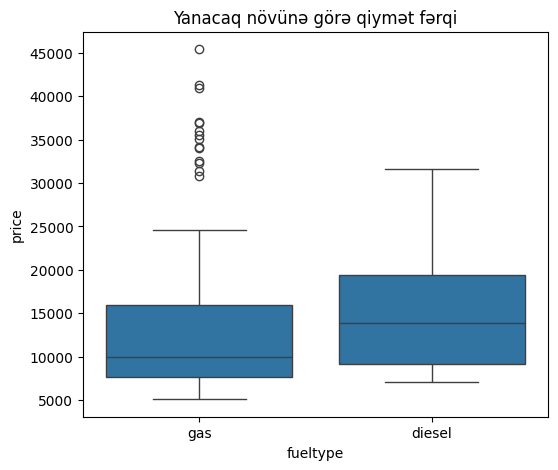

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(x='fueltype', y='price', data=df)
plt.title("Yanacaq növünə görə qiymət fərqi")
plt.show()


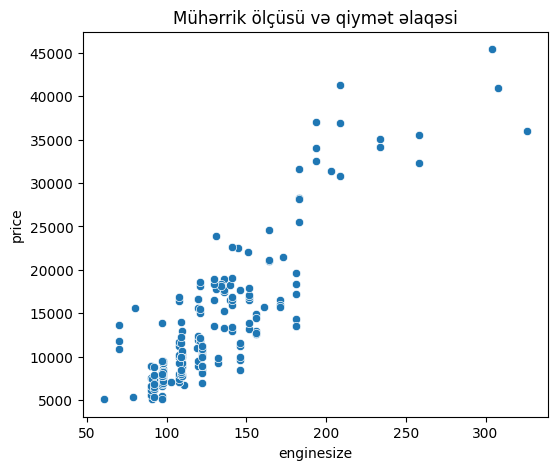

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='enginesize', y='price', data=df)
plt.title("Mühərrik ölçüsü və qiymət əlaqəsi")
plt.show()


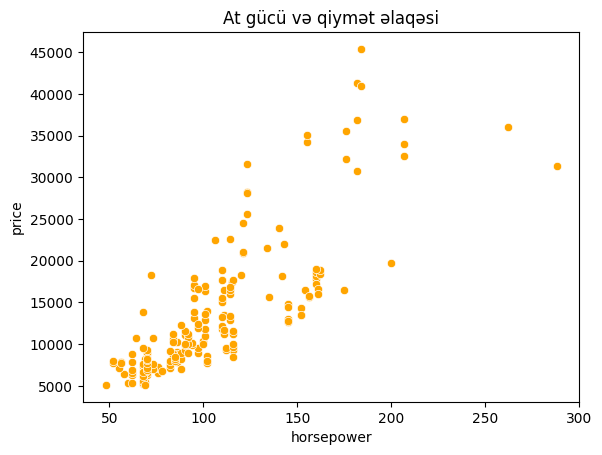

In [ ]:
sns.scatterplot(x='horsepower', y='price', data=df, color='orange')
plt.title("At gücü və qiymət əlaqəsi")
plt.show()


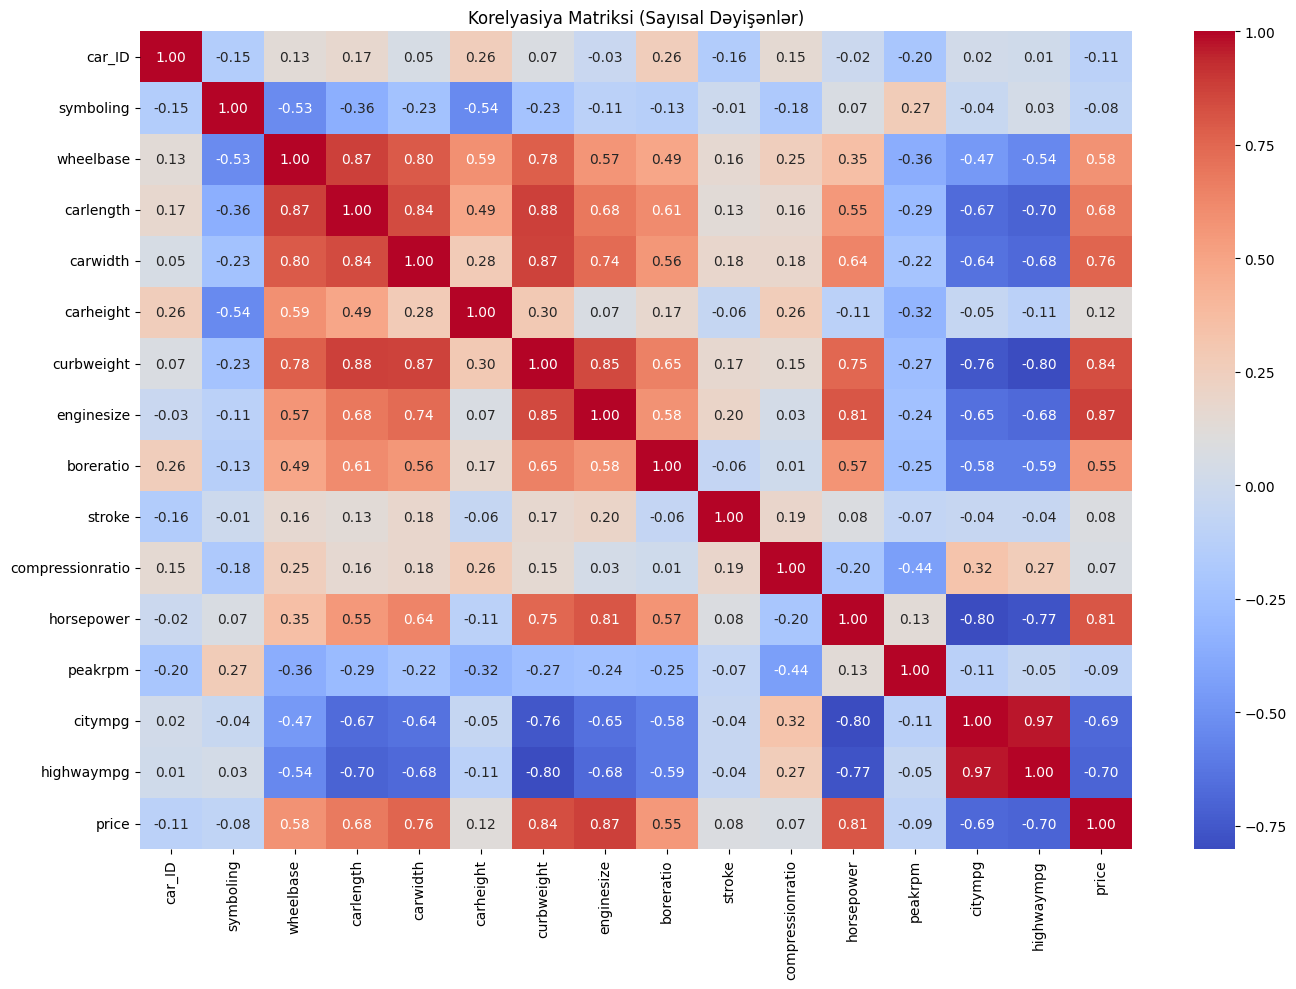

In [ ]:
# Korelyasiya matriksi
plt.figure(figsize=(14, 10))
corr_matrix = df[numerical_columns + ['price']].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelyasiya Matriksi (Sayısal Dəyişənlər)")
plt.tight_layout()
plt.show()

Əsas Tapıntılar (Insights)


enginesize və horsepower artdıqca avtomobilin qiyməti yüksəlir.

diesel tipli avtomobillər, ortalama olaraq, gas tipindən ucuzdur.

bmw, audi, porsche kimi markalar ən bahalı qrupdadır.

curbweight (avtomobil çəkisi) və width qiymətə müsbət təsir edir.

Avtomobilin texniki parametrləri (ölçü, güc, çəki) qiymət üçün ən vacib göstəricilərdir.

For Power BI integration

In [ ]:
df.to_csv("clean_car_data.csv", index=False)

In [ ]:
from google.colab import files
files.download("clean_car_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>